https://scipy-lectures.org/packages/statistics/index.html

# Data representation and interaction

## Data as a table

The setting that we consider for statistical analysis is that of multiple observations or samples described by a set of different attributes or features. The data can than be seen as a 2D table, or matrix, with columns giving the different attributes of the data, and rows the observations.

```
"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353
"5";"Female";137;132;134;"147";"65.0";951545
```

## The pandas data-frame

 We will store and manipulate this data in a pandas.DataFrame, from the pandas module. It is the Python equivalent of the spreadsheet table. It is different from a 2D numpy array as it has named columns, can contain a mixture of different data types by column, and has elaborate selection and pivotal mechanisms.

### from file

In [50]:
import pandas
from matplotlib import pyplot as plt
data = pandas.read_csv('./data/brain_size.csv', sep=';', na_values=".")

In [43]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


### from arrays

In [13]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [8]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


### manipulating data

In [9]:
data.shape    # 40 rows and 8 columns

(40, 8)

In [10]:
data.columns  # It has columns 

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [11]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [8]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [13]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Exercise

Exercise

What is the mean value for VIQ for the full population?

How many males/females were included in this study?

Hint use ‘tab completion’ to find out the methods that can be called, instead of ‘mean’ in the above example.

What is the average value of MRI counts expressed in log units, for males and females?

In [6]:
data['VIQ'].mean()

112.35

In [9]:
groupby_gender.size()

Gender
Female    20
Male      20
dtype: int64

In [14]:
np.log(groupby_gender['MRI_Count'].mean())

Gender
Female    13.667770
Male      13.769315
Name: MRI_Count, dtype: float64

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

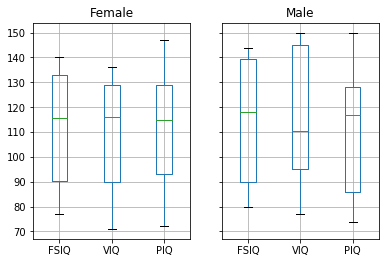

In [28]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

### Plotting data
Pandas comes with some plotting tools (pandas.tools.plotting, using matplotlib behind the scene) to display statistics of the data in dataframes:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113c95978>,
      dtype=object)

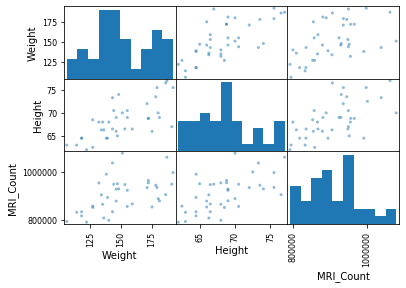

In [16]:
from pandas import plotting

plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113c95940>,
      dtype=object)

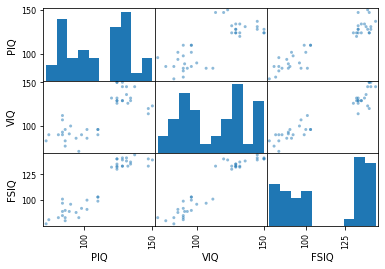

In [17]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]) 

### Exercise

Plot the scatter matrix for males only, and for females only. Do you think that the 2 sub-populations correspond to gender?

In [19]:
fem_data = data[data['Gender'] == 'Female']
male_data = data[data['Gender'] == 'Male']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1135947f0>,
      dtype=object)

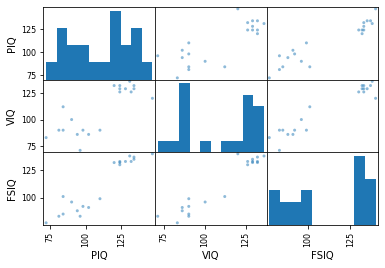

In [20]:
plotting.scatter_matrix(fem_data[['PIQ', 'VIQ', 'FSIQ']]) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11313db70>,
      dtype=object)

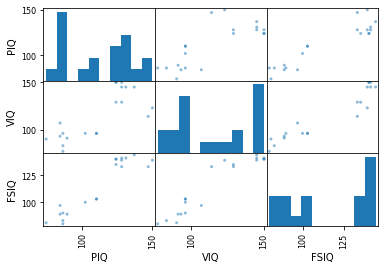

In [21]:
plotting.scatter_matrix(male_data[['PIQ', 'VIQ', 'FSIQ']]) 

# Hypothesis testing: comparing two groups

In [22]:
from scipy import stats

## Student’s t-test: the simplest statistical test

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help)

In [25]:
#  With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [27]:
# We have seen above that the mean VIQ in the male and female populations were different. 
# To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

## Paired tests: repeated measurements on the same individuals

In [28]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [29]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [30]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

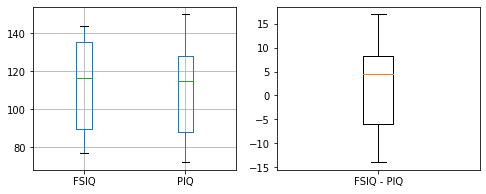

In [49]:
# Box plot of FSIQ and PIQ (different measures od IQ)
plt.figure(figsize=(8, 3))
plt.subplot(121)
data.boxplot(column=['FSIQ', 'PIQ'])

# Boxplot of the difference
plt.subplot(122)
plt.boxplot(data['FSIQ'] - data['PIQ'])
plt.xticks((1, ), ('FSIQ - PIQ', ))

plt.show()

In [31]:
stats.wilcoxon(data['FSIQ'], data['PIQ']) 

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

### Exercise

In [39]:
female_weight = data[data['Gender'] == 'Female']['Weight'].dropna()
male_weight = data[data['Gender'] == 'Male']['Weight'].dropna()
stats.ttest_ind(female_weight, male_weight) 

Ttest_indResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05)

In [40]:
stats.wilcoxon(female_viq, male_viq)

WilcoxonResult(statistic=82.5, pvalue=0.4007115281925314)

# Linear models, multiple factors, and analysis of variance

## “formulas” to specify statistical models in Python

### A simple linear regression
Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:

$y = x * \textit{coef} + \textit{intercept} + e$

where e is observation noise. We will use the statsmodels module to:

- Fit a linear model. We will use the simplest strategy, __ordinary least squares (OLS).__
- Test that coef is non zero.

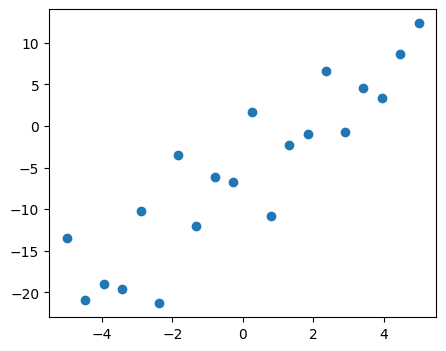

In [142]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')

In [51]:
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [53]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           8.56e-08
Time:                        19:58:03   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.000      -7.710      -3.357
x              2.9369      0.341      8.604      0.000       2.220       3.654
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Terminology__:

Statsmodels uses a statistical terminology: the y variable in statsmodels is called ‘endogenous’ while the x variable is called exogenous. This is discussed in more detail here.

To simplify, y (endogenous) is the value you are trying to predict, while x (exogenous) represents the features you are using to make the prediction.

In [55]:
model.rsquared

0.8044102939875739

In [63]:
model.params

Intercept   -5.533459
x            2.936888
dtype: float64

### Categorical variables: comparing groups or multiple categories

In [163]:
data = pandas.read_csv('./data/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [164]:
# We can write a comparison between IQ of male and female using a linear model:
model = ols("VIQ ~ Gender + 1", data).fit()
# An integer column can be forced to be treated as categorical using:
# model = ols("VIQ ~ C(Gender)", data).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.445
Time:                        21:07:54   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.619      0.000      98.704     120.196
Gender[T.Male]     5.8000      7.507      0.773      0.445      -9.397      20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Link to t-tests between different FSIQ and PIQ__

To compare different types of IQ, we need to create a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable:

In [165]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
data_long

,iq,type
0,133,fsiq
1,140,fsiq
2,139,fsiq
3,133,fsiq
4,137,fsiq
...,...,...
35,128,piq
36,124,piq
37,94,piq
38,74,piq


In [166]:
model = ols("iq ~ type", data_long).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.643
Time:                        21:07:54   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      0.000     106.119     120.781
type[T.piq]    -2.4250      5.208     -0.466      0.643     -12.793       7.943
==============================================================================
Omnibus:                      164.598   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.062
Skew:                          -0.110   Prob(JB):                       0.0178
Kurtosis:                       1.461   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])  

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [172]:
import pandas
from statsmodels.formula.api import ols

data = pandas.read_csv('data/brain_size.csv', sep=';', na_values='.')

model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Thu, 05 Mar 2020   Prob (F-statistic):             0.0184
Time:                        21:08:22   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.876      0.069     -13.696     346.948
Gender[T.Male]     8.8524     10.710      0.827      0.414     -12.890      30.595
MRI_Count          0.0002   6.46e-05      2.615      0.013    3.78e-05       0.000
Height            -3.0837      1.276     -2.417      0.021      -5.674      -0.494
==============================================================================
Omnibus:                        7.373   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                2.252
Skew:                           0.005   Prob(JB):                        0.324
Kurtosis:                       1.823   Cond. No.                     2.40e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:
# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
model.f_test([0, 1, 0, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.68319608]]), p=0.4140878441244694, df_denom=35, df_num=1>

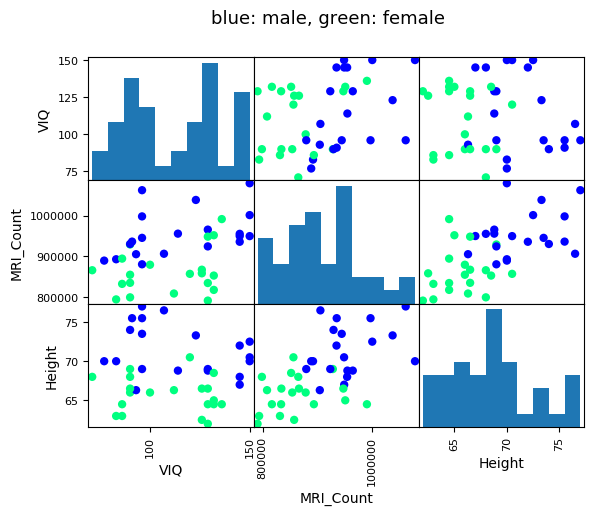

In [175]:
# This plotting is useful to get an intuitions on the relationships between
# our different variables

from pandas import plotting
import matplotlib.pyplot as plt

# Fill in the missing values for Height for plotting
data['Height'].fillna(method='pad', inplace=True)

# The parameter 'c' is passed to plt.scatter and will control the color
# The same holds for parameters 'marker', 'alpha' and 'cmap', that
# control respectively the type of marker used, their transparency and
# the colormap
plotting.scatter_matrix(data[['VIQ', 'MRI_Count', 'Height']],
                        c=(data['Gender'] == 'Female'), marker='o',
                        alpha=1, cmap='winter')

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13)

plt.show()

# Multiple Regression: including multiple factors

Consider a linear model explaining a variable z (the dependent variable) with 2 variables x and y:

$z = x \, c_1 + y \, c_2 + i + e$

Such a model can be seen in 3D as fitting a plane to a cloud of (x, y, z) points.

In [79]:
# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

Text(0.5, 0, 'Z')

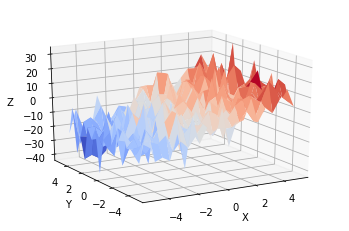

In [95]:
x = np.linspace(-5, 5, 21)
# We generate a 2D grid
X, Y = np.meshgrid(x, x)

# To get reproducable values, provide a seed value
np.random.seed(1)

# Z is the elevation of this 2D grid
Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)

# Plot the data
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [96]:
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

# First we need to flatten the data: it's 2D layout is not relevent.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

data = pandas.DataFrame({'x': X, 'y': Y, 'z': Z})

# Fit the model
model = ols("z ~ x + y", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     320.4
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.89e-86
Time:                        20:17:42   Log-Likelihood:                -1537.7
No. Observations:                 441   AIC:                             3081.
Df Residuals:                     438   BIC:                             3094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5052      0.378    -11.924      0.0

### Example: the iris data

In [97]:
data = pandas.read_csv('data/iris.csv')

Text(0.5, 0.98, 'blue: setosa, green: versicolor, red: virginica')

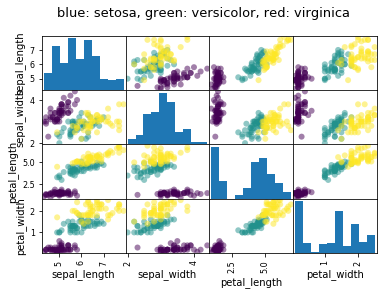

In [118]:
# Express the names as categories
categories = pandas.Categorical(data['name'])

# The parameter 'c' is passed to plt.scatter and will control the color
plotting.scatter_matrix(data, c=categories.codes, marker='o')

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)

In [97]:
model = ols('sepal_width ~ name + petal_length', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.58e-20
Time:                        20:19:41   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0.099     29.989      0.000       2.785       3.178
name[T.versicolor]    -1.4821      0.181     -8.190      0.000      -1.840      -1.124
name[T.virginica]     -1.6635      0.256     -6.502      0.000      -2.169      -1.158
petal_length           0.2983      0.061      4.920      0.000       0.178       0.418
==============================================================================
Omnibus:                        2.868   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.885
Skew:                          -0.082   Prob(JB):                        0.236
Kurtosis:                       3.659   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Post-hoc hypothesis testing: analysis of variance (ANOVA)

In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a vector of ‘contrast’ on the parameters estimated: we want to test `"name[T.versicolor] - name[T.virginica]"`, with an F-test:

In [102]:
# Now formulate a "contrast", to test if the offset for versicolor and
# virginica are identical

print('Testing the difference between effect of versicolor and virginica')
print(model.f_test([0, 1, -1, 0]))

Testing the difference between effect of versicolor and virginica
<F test: F=array([[3.24533535]]), p=0.07369058781701113, df_denom=146, df_num=1>


# More visualization: seaborn for statistical exploration

Seaborn combines simple statistical fits with plotting on pandas dataframes.

Let us consider a data giving wages and many other personal information on 500 individuals (Berndt, ER. The Practice of Econometrics. 1991. NY: Addison-Wesley).

 The full code loading and plotting of the wages data is found in corresponding example

In [126]:
# Standard library imports
import urllib
import os
import requests

import matplotlib.pyplot as plt

In [177]:
if not os.path.exists('data/wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'data/wages.txt')

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('data/wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

/Users/alex/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [146]:
data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,1.055378,29,3,5,0,0
530,12,0,1,33,0,0.785330,51,1,5,0,1
531,17,0,1,25,1,1.366423,48,1,5,0,1
532,12,1,0,13,1,1.298416,31,3,5,0,1


In [132]:
import seaborn

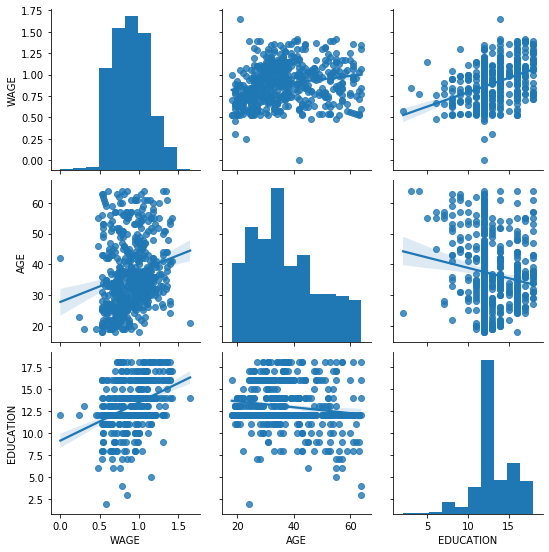

In [134]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

Text(0.5, 0.98, 'Effect of gender: 1=Female, 0=Male')

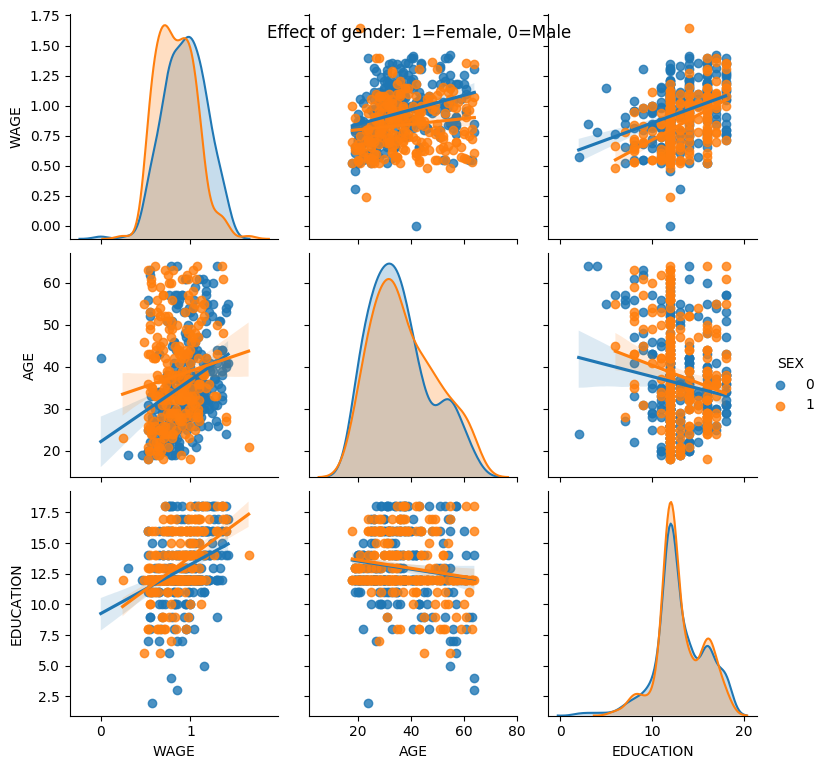

In [140]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

Text(0.5, 0.98, 'Effect of race: 1=Other, 2=Hispanic, 3=White')

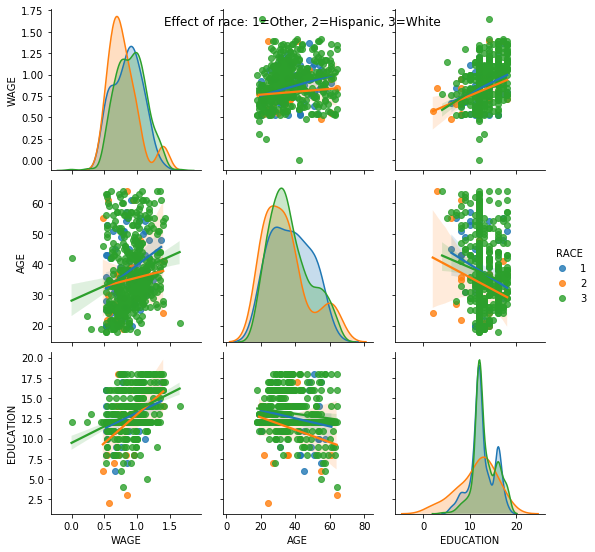

In [136]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

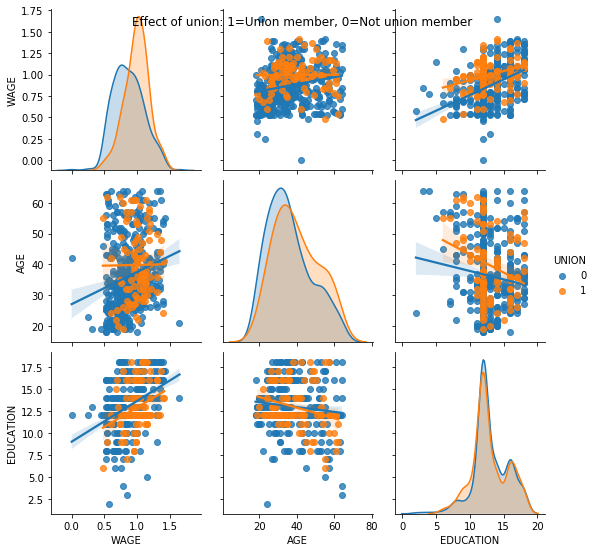

In [137]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

Robust regression

 Given that, in the above plot, there seems to be a couple of data points that are outside of the main cloud to the right, they might be outliers, not representative of the population, but driving the regression.
To compute a regression that is less sentive to outliers, one must use a robust model. This is done in seaborn using robust=True in the plotting functions, or in statsmodels by replacing the use of the OLS by a “Robust Linear Model”, statsmodels.formula.api.rlm().

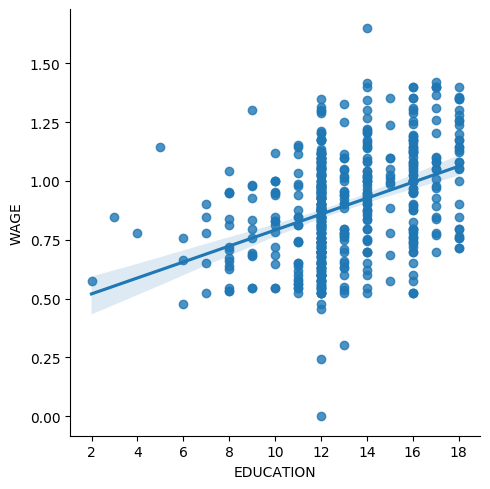

In [141]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data, robust=True)

plt.show()

## Testing for interactions

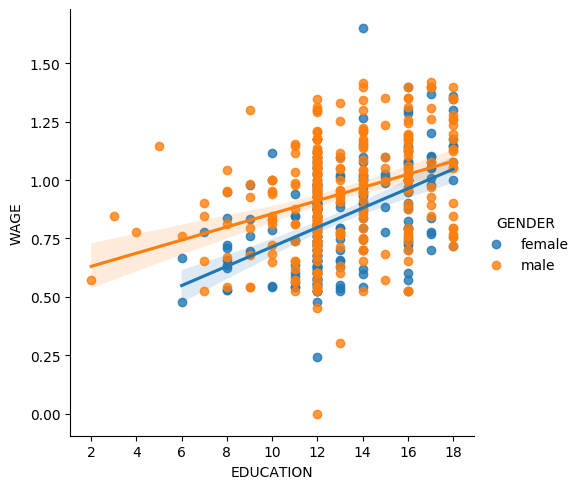

In [154]:
data['GENDER'] = np.choose(data.SEX, ['male', 'female'])
# Plot 2 linear fits for male and female.
seaborn.lmplot(y='WAGE', x='EDUCATION', hue='GENDER', data=data)

In [160]:
import statsmodels.formula.api as sm

# Note that this model is not the plot displayed above: it is one
# joined model for male and female, not separate models for male and
# female. The reason is that a single model enables statistical testing
result = sm.ols(formula='WAGE ~ EDUCATION + GENDER', data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WAGE   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           2.01e-25
Time:                        21:01:40   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4053      0.046      8.732      0.000       0.314       0.496
GENDER[T.male]     0.1008      0.018      5.625      0.000       0.066       0.136
EDUCATION          0.0334      0.003      9.768      0.000       0.027       0.040
==============================================================================
Omnibus:                        4.675   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.876
Skew:                          -0.147   Prob(JB):                       0.0873
Kurtosis:                       3.365   Cond. No.                         69.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The plots above highlight that there is not only a different offset in wage but also a different slope

We need to model this using an interaction

In [158]:
result = sm.ols(formula='WAGE ~ EDUCATION + GENDER + EDUCATION * GENDER',
                data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           2.94e-25
Time:                        21:01:17   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.2998      0.072      4.173      0.000       0.159       0.441
GENDER[T.male]               0.2750      0.093      2.972      0.003       0.093       0.457
EDUCATION                    0.0415      0.005      7.647      0.000       0.031       0.052
EDUCATION:GENDER[T.male]    -0.0134      0.007     -1.919      0.056      -0.027       0.000
==============================================================================
Omnibus:                        4.838   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.000
Skew:                          -0.156   Prob(JB):                       0.0821
Kurtosis:                       3.356   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the p-value of the interaction of gender and education, the data does not support the hypothesis that education benefits males more than female (p-value > 0.05).

__Take home messages__

- Hypothesis testing and p-values give you the **significance** of an effect / difference.
- __Formulas__ (with categorical variables) enable you to express rich links in your data.
- __Visualizing__ your data and fitting simple models give insight into the data.
- __Conditionning__ (adding factors that can explain all or part of the variation) is an important modeling aspect that changes the interpretation.